# Load Libraries 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns




# Load Data set

In [3]:
df = pd.read_csv("student-por.csv")
print(df.head())

# total students 
total_student = len(df)
print(total_student)

# changing column name 
df.rename(columns={'sex': 'Gender'}, inplace= True)
print(df.columns)


# total number of male student 
male_student = len(df[df["Gender"].str.lower() == 'm'])
male_percentage = (male_student / total_student ) * 100
print(f"The total number of Male students are     : {male_percentage:.2f}%")

# total number of female student 
female_student = len(df[df["Gender"].str.lower() == 'f'])
female_percentage = (female_student / total_student) * 100
print(f"The percentage of female student is  :{female_percentage:.2f}%")

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
649
Index(['school', 'Gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'F

# ploting for grades

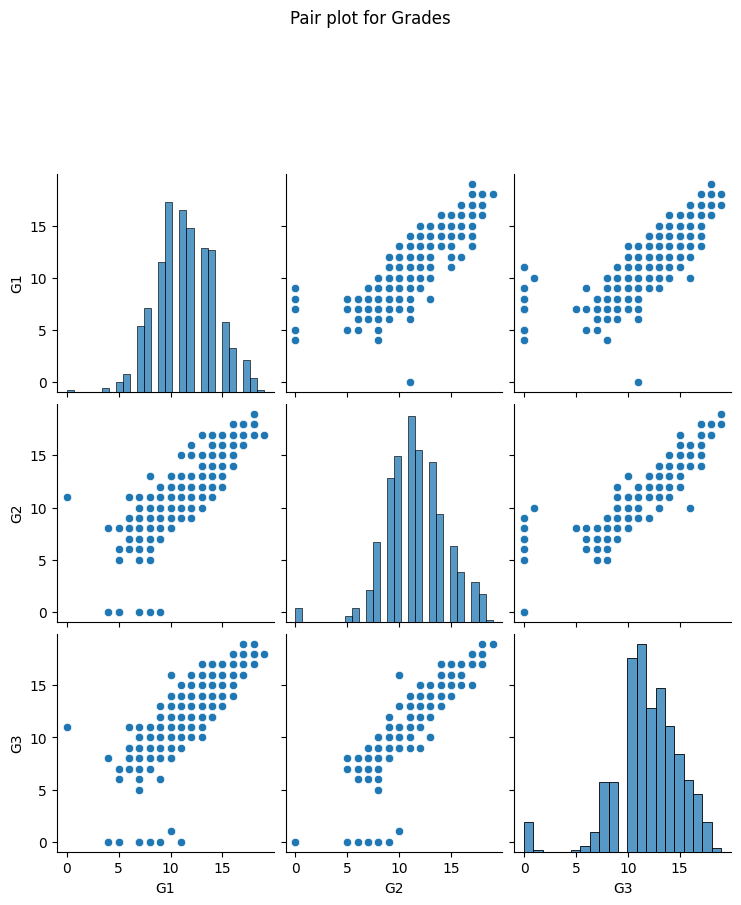

In [4]:
sns.pairplot(df[['G1','G2', 'G3']])
plt.suptitle('Pair plot for Grades', y = 1.20)
plt.show()

#  Correlation Heatmap

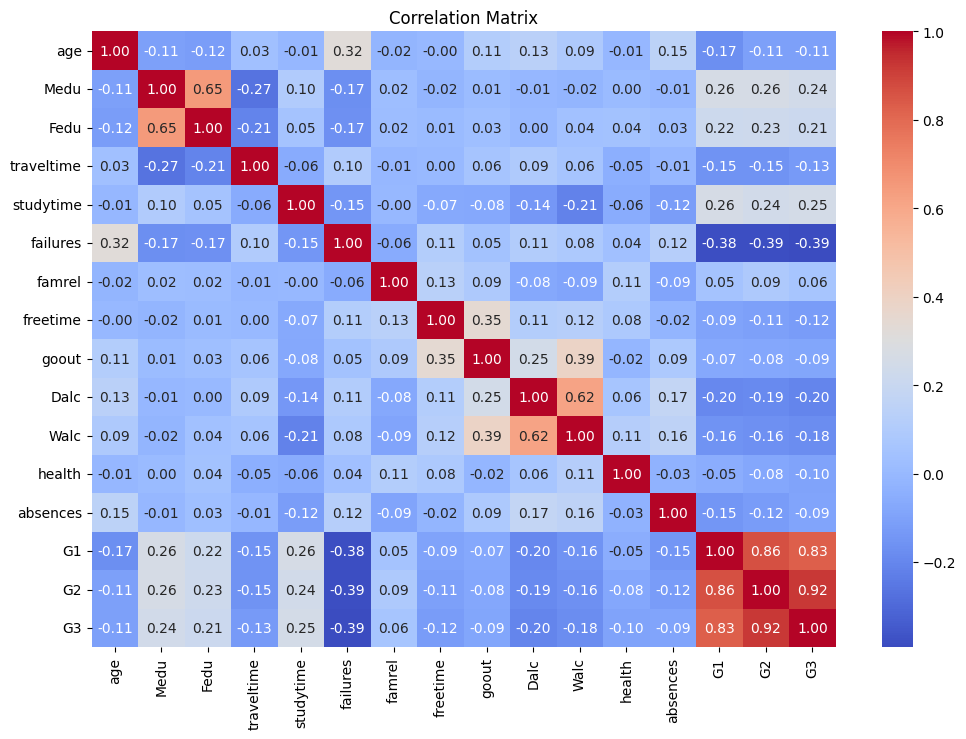

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Process Data (Encode + Clean) 

In [6]:
# One-hot Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first= True)

# Features (X) and  Target (Y)
X = df_encoded.drop('G3', axis= 1)
Y = df_encoded['G3']



# Split data Train and test data 

In [7]:
#inilizing variable train and test data  


# test data is 20% and train data is 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
# random state means ensures reproducibility.



# Using Linear Regression

In [8]:
model = LinearRegression()
model.fit(X_train, Y_train) 


LinearRegression()

# Make prediction

In [9]:
Y_pred = model.predict(X_test)

# Evaluate the model 

In [10]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean squared error  :", mse)
print("R2 score : ", r2)


Mean squared error  : 1.4759092563639304
R2 score :  0.8486513286537316


# Visualize Predictions vs Actual

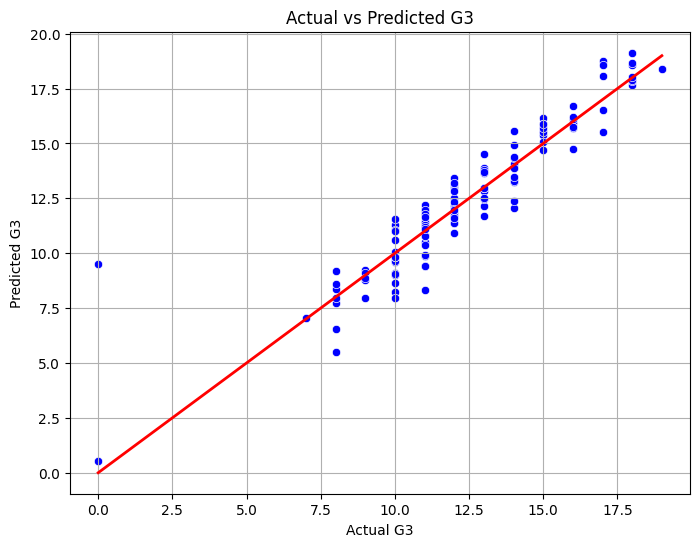

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=Y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)  # perfect line or best fit line 
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted G3")
plt.grid(True)
plt.show()


#  Visualize Residuals (Errors)

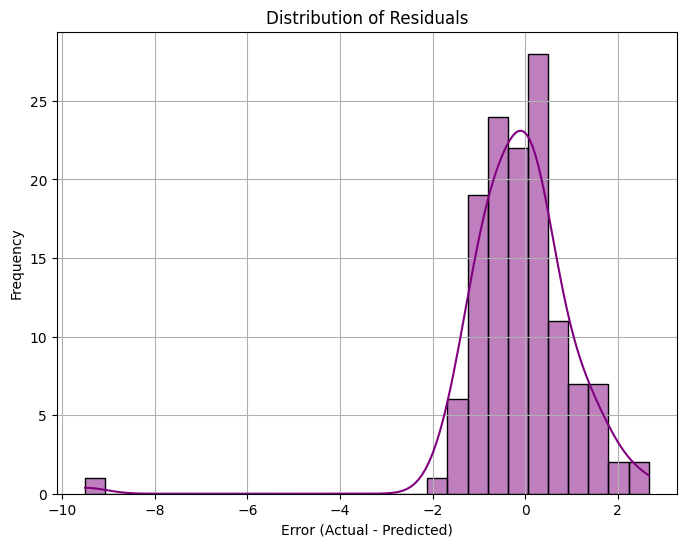

In [12]:
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
